Провести базовый EDA выбранного набора данных. Требования к анализу: построить не менее 4 визуализаций различных видов; каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Дополнительно: построить дополнительно не менее 2 визуализаций (итого не менее 6); в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
#Источник: Medical Cost Personal Datasets https://www.kaggle.com/datasets/mirichoi0218/insurance
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.duplicated().sum()

1

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


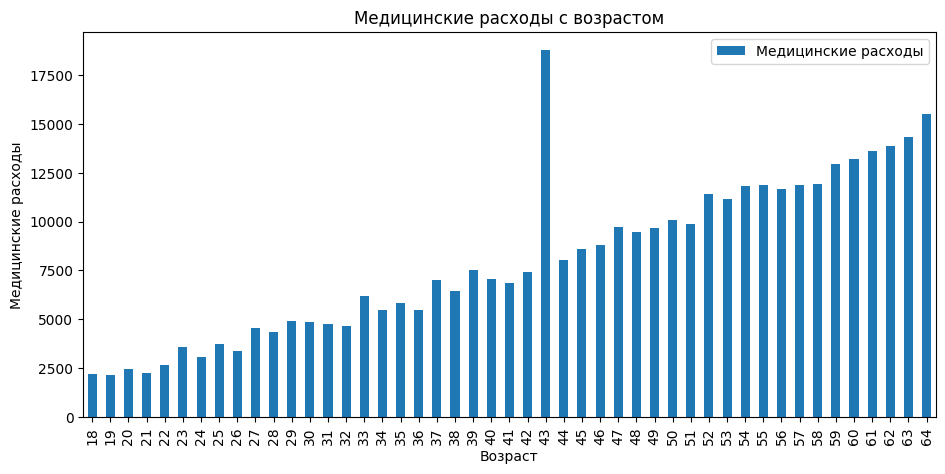

In [ ]:
#проанализирую медианные значения расходов по возрастам:
charges_by_age = df[['age', 'charges']].groupby('age').median()
charges_by_age.plot(kind='bar',
                    title='Медицинские расходы с возрастом',
                    xlabel='Возраст',
                    ylabel='Медицинские расходы')
plt.legend(['Медицинские расходы'])
plt.show()
#оказалось, есть сильно отличающееся медианой значение => вероятно, визуализация bar не удобна для данного набора данных

In [ ]:
df[df.age == 43]['charges'].median()

18767.7377

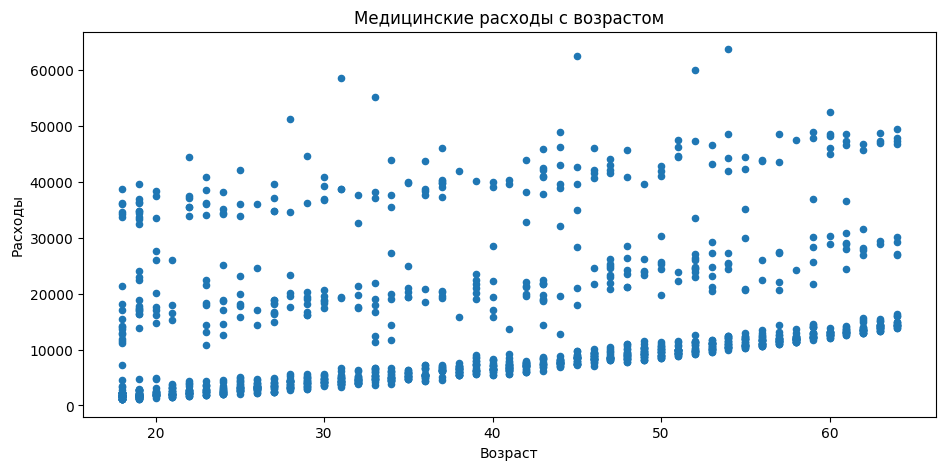

In [ ]:
#значит для таких данных лучше подойдет представление scatter
df[['age', 'charges']].plot(kind='scatter',
                    x='age',
                    y='charges',
                    xlabel='Возраст',
                    ylabel='Расходы',
                    title='Медицинские расходы с возрастом')
plt.show()

Из графика очевидно, что медицинские расходы с большой вероятностью будут плавно расти с возрастом. Значения расходов, находящиеся в большом отрыве от большинства значений с 0 до ~15000, скорее всего связаны со случаями, отличающимися по признакам от среднестатичтических (например, слишком большой или слишком малый ИМТ, большое количество детей). Поэтому стоит рассмотреть зависимость расходов от возраста, учитывая подобные признаки

In [ ]:
#чтобы ИМТ имел смысл в этом наборе данных, распределяю ИМТ по категориям
def bmi_category(bmi):
    if bmi < 18.5:
        return '1. Недовес'
    elif 18.5 <= bmi < 25:
        return '2. Нормальный вес'
    elif 25 <= bmi < 30:
        return '3. Лишний вес'
    elif 30 <= bmi < 35:
        return '4. Ожирение 1ст'
    elif 35 <= bmi < 40:
        return '5. Ожирение 2ст'
    elif 40 <= bmi:
        return '6. Ожирение 3ст'

df['bmi_cat'] = df['bmi'].apply(bmi_category)
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_cat
0,19,female,27.900,0,yes,southwest,16884.92400,3. Лишний вес
1,18,male,33.770,1,no,southeast,1725.55230,4. Ожирение 1ст
2,28,male,33.000,3,no,southeast,4449.46200,4. Ожирение 1ст
3,33,male,22.705,0,no,northwest,21984.47061,2. Нормальный вес
4,32,male,28.880,0,no,northwest,3866.85520,3. Лишний вес


In [ ]:
df['bmi_cat'].value_counts()

4. Ожирение 1ст      390
3. Лишний вес        386
2. Нормальный вес    225
5. Ожирение 2ст      225
6. Ожирение 3ст       91
1. Недовес            20
Name: bmi_cat, dtype: int64

In [ ]:
bmi_cat_age_charges = df.pivot_table(
                        index='bmi_cat',
                        columns='age',
                        values='charges',
                        aggfunc = 'median').fillna(0)

bmi_cat_age_charges

age,18,19,20,21,22,23,24,25,26,27,...,55,56,57,58,59,60,61,62,63,64
bmi_cat,,,,,,,,,,,,,,,,,,,,,
1. Недовес,7262.125750,1674.56260,0.000000,2876.362425,0.000000,2775.192150,0.000000,0.00000,8568.296675,15006.579450,...,0.00000,0.00000,11534.87265,0.000000,0.000000,13204.285650,0.000000,0.000000,0.000000,0.00000
2. Нормальный вес,1705.624500,1737.37600,17439.539915,3077.095500,2731.912200,14426.073850,2650.131375,4391.65200,3176.815900,3561.888900,...,10791.96000,16494.86775,12029.28670,11589.650650,19001.357225,12821.052675,13415.038100,12957.118000,14449.854400,27037.91410
3. Лишний вес,2199.510350,2710.82855,2357.343200,2104.113400,2155.681500,7957.867425,3046.062000,3309.79260,3687.476800,10902.557875,...,11184.55795,11657.71890,12629.16560,11886.783625,12864.718675,13217.094500,28868.663900,13937.666500,14256.192800,14988.43200
4. Ожирение 1ст,2203.735950,23571.31776,2311.898925,2020.552300,2741.948000,4466.621400,4426.503450,3865.89175,3490.549100,4260.744000,...,11934.56890,12796.26660,11842.62375,11946.625900,14007.222000,45008.955500,13286.450125,14531.618375,13927.702275,16455.70785
5. Ожирение 2ст,1969.335375,2136.88225,32594.816250,1917.318400,19170.298475,3549.104150,2233.956250,2534.39375,2322.621800,37133.898200,...,16012.17453,11674.13000,12646.20700,11611.181750,21797.000400,12741.167450,27941.287580,13470.804400,14474.675000,14414.60625
6. Ожирение 3ст,1634.573400,20741.04210,1984.453300,0.000000,44501.398200,2438.055200,38126.246500,17878.90068,3201.245150,21652.592850,...,12485.80090,10848.00395,11576.13000,17804.331320,48970.247600,48673.558800,12818.966000,0.000000,14480.289525,13831.11520


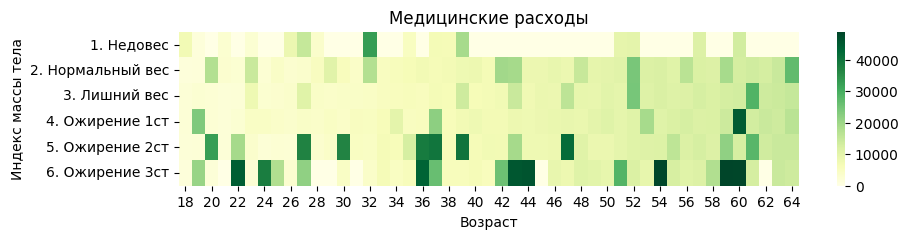

In [ ]:
plt.rcParams['figure.figsize'] = [10, 2]
sns.heatmap(bmi_cat_age_charges, cmap='YlGn', cbar_kws= {'orientation': 'vertical'})
plt.title('Медицинские расходы')
plt.xlabel('Возраст')
plt.ylabel('Индекс массы тела')
plt.show()

В большинстве случаев с возрастом расходы плавно растут с почти 0 до ~15000 для любой весовой категории. Однако присутствуют отдельные случаи, когда расходы значительно выше, независимо от возраста - в основном эти случаи приходятся на весовые категории 5 и 6. Учитывая то, что в наборе данных только 91 человек с ожирением 3 степени (в 2-3 раза меньше, чем других категорий) и при этом по графику самые большие расходы встречаются именно у этой категории, то, если бы количество случаев по категориям были бы равны, возможно, было бы еще очевиднее, что расходы людей с 3 степенью ожирения далеко в отрыве от расходов других

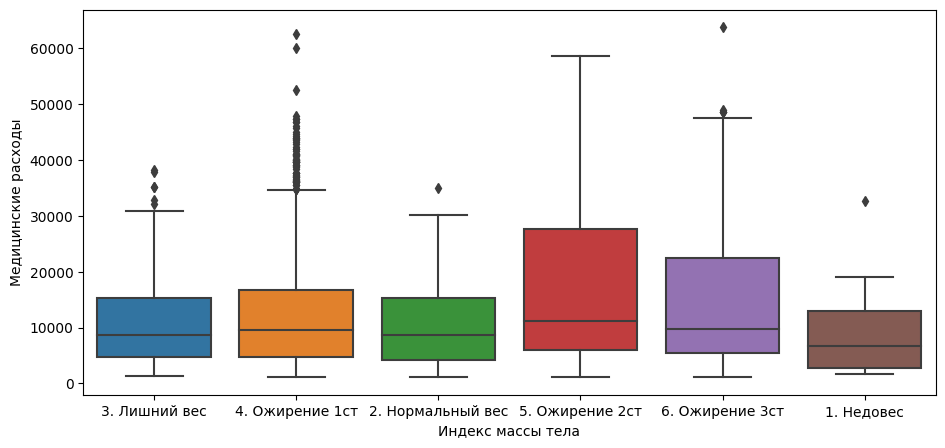

In [ ]:
plt.rcParams['figure.figsize'] = [11, 5]
sns.boxplot(x="bmi_cat", y="charges", data=df, orient = 'v')
plt.xlabel('Индекс массы тела')
plt.ylabel('Медицинские расходы')
plt.show()

Думаю, по боксплотам правильнее будет сравнивать между собой те ящики, которые содержат примерно одинаковое количество случаев. Т. е. категорию "лишний вес" с "ожирение 1ст" (по ~390 случаев), категорию "нормальный вес" с "ожирение 2ст" (по 225 случаев), и категорию "ожирение 3 ст" с "недовес" (91 и 20).

В случаях с лишним весом медицинские расходы в основном ниже, чем в случах с ожирением 1 степени. В случаях с нормальным весом медицинские расходы в основном ниже, чем в случах с ожирением 2 степени. В случаях с ожирением 3 степени медицинские расходы в основном выше, чем в случах с недовесом.

In [ ]:
df['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Т. к. случаев с 4 и 5 детьми относительно остальных случаев очень мало, не стану включать это в визуализацию. Также, не буду включать случаи без детей, т. к. их гораздо больше, чем по отдельности взятых других случаев. Это нецелесообразно и может привести к неверным выводам

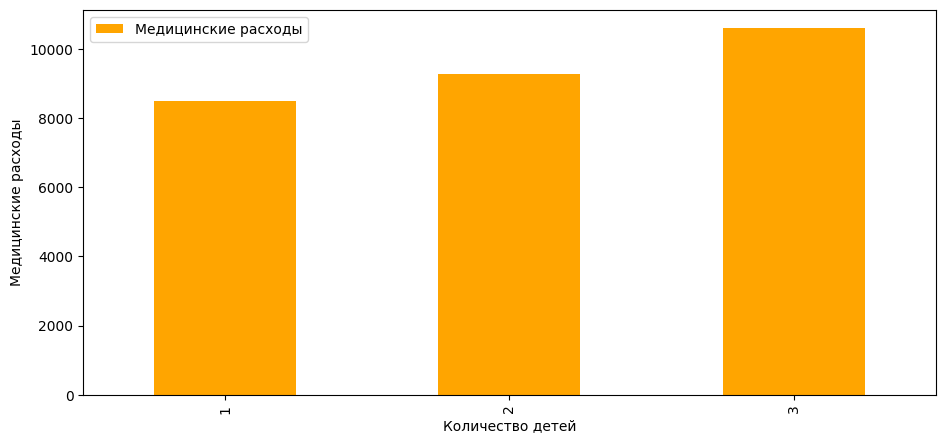

In [ ]:
ch_by_ch = df[['children', 'charges']].groupby('children').median()
ch_by_ch.loc[[1, 2, 3]].plot(kind='bar',
                             xlabel='Количество детей',
                             ylabel='Медицинские расходы',
                             color = 'orange')
plt.legend(['Медицинские расходы'])
plt.show()

Предполагаю, что с большой вероятностью медицинские расходы будут расти с увеличением количества детей

In [ ]:
#помещу расходы и расходы курильщиков в одну таблицу с ИМТ для удобства построения графика:
a = df.groupby(['smoker','bmi_cat'])['charges'].median().reset_index()
smoker_yes = a[a.smoker == 'yes'][['bmi_cat', 'charges']]
smoker_yes.columns = ['bmi_cat', 'smokers_charges']
smoker_no = a[a.smoker == 'no'][['bmi_cat', 'charges']]
smoker_bmi_charges = smoker_no.merge(smoker_yes, on = 'bmi_cat')
#добавляю столбец category, чтобы при построении графика не возникала ошибка с неиндексируемым объектом в bmi_cat
smoker_bmi_charges['category'] = ['1', '2','3','4','5','6']
smoker_bmi_charges

,bmi_cat,charges,smokers_charges,category
0,1. Недовес,3732.625100,15006.579450,1
1,2. Нормальный вес,6593.508300,19479.903700,2
2,3. Лишний вес,7063.915700,21215.433000,3
3,4. Ожирение 1ст,7661.043725,39086.308625,4
4,5. Ожирение 2ст,8671.191250,42118.090000,5
5,6. Ожирение 3ст,7727.467125,45863.205000,6


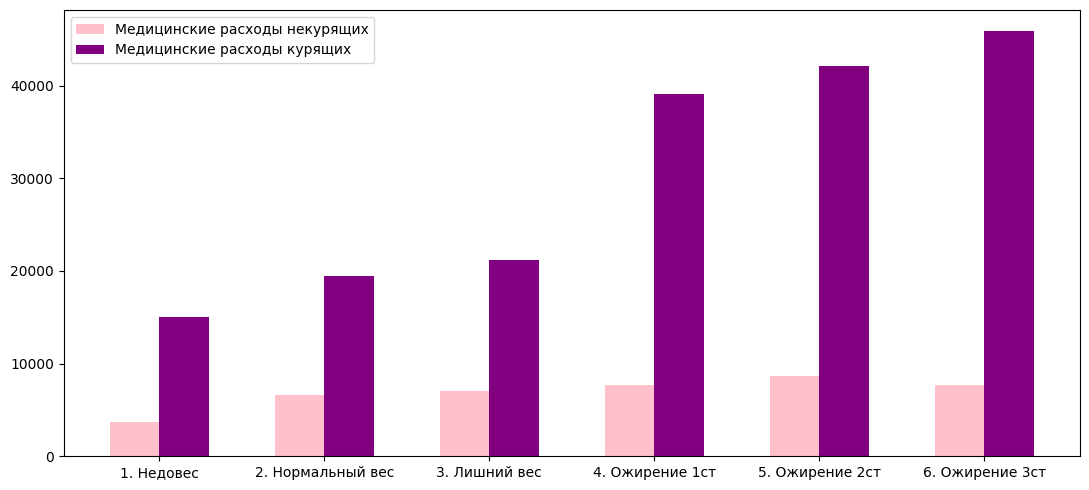

In [ ]:
#Сравнение расходов курящих и не курящих с группировкой по ИМТ
x = np.array(smoker_bmi_charges.index.tolist())
width = 0.3
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, smoker_bmi_charges.charges, width, label='Медицинские расходы некурящих', color = 'pink')
rects2 = ax.bar(x + width/2, smoker_bmi_charges.smokers_charges, width, label='Медицинские расходы курящих', color = 'purple')
ax.set_xticks(x)
ax.set_xticklabels(smoker_bmi_charges.bmi_cat)
ax.legend()
fig.tight_layout()

Расходы курящих в разы больше расходов некурящих. Относительно только курящих: расходы увеличиваются примерно в 2 раза, если у курящего ожирение любой степени. Расходы некурящих почти не зависят от их веса.